In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read the data
sales_df = pd.read_csv('../data/Sales.csv')
customer_df = pd.read_csv('../data/Customer.csv')
product_df = pd.read_csv('../data/Product.csv')

# Convert date columns to datetime
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])

In [9]:
sales_df.head() 

,Order Line,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164


# Monthly Sales Trend Analysis

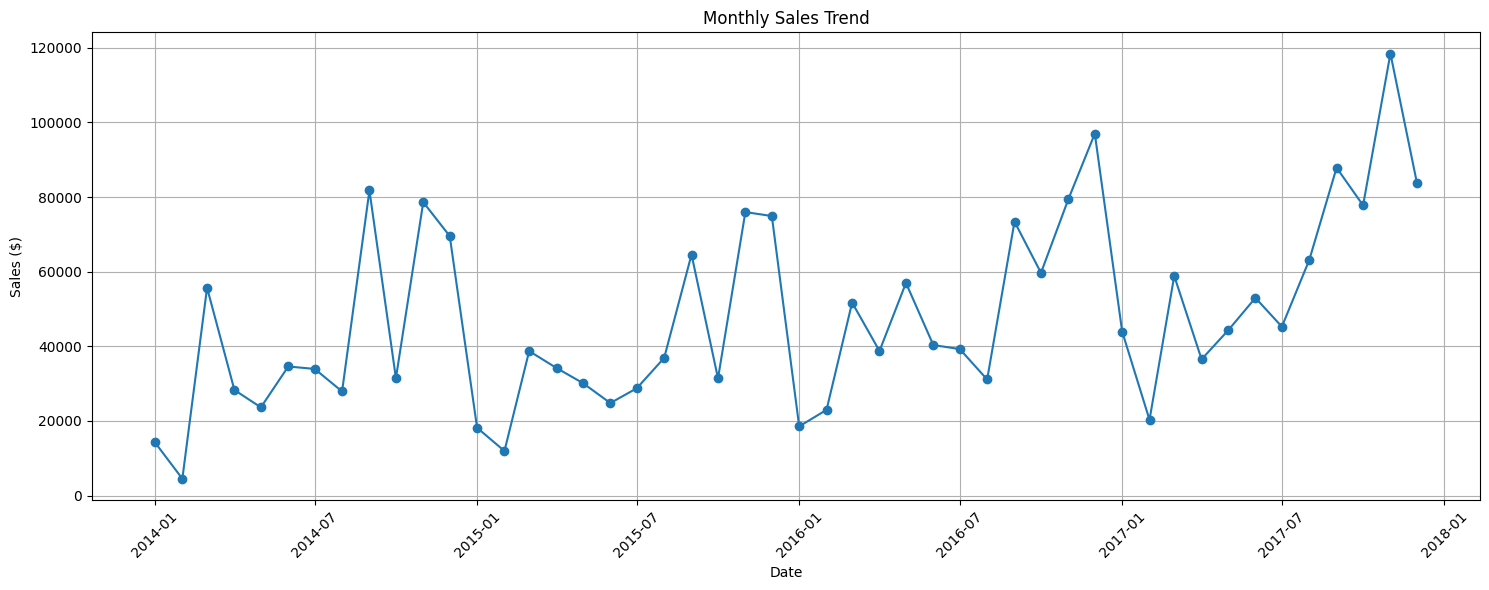

In [10]:
# Monthly sales trend
monthly_sales = sales_df.groupby(sales_df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Convert period to datetime for plotting
monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str).apply(lambda x: pd.to_datetime(x + '-01'))

plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Sales Trend Analysis

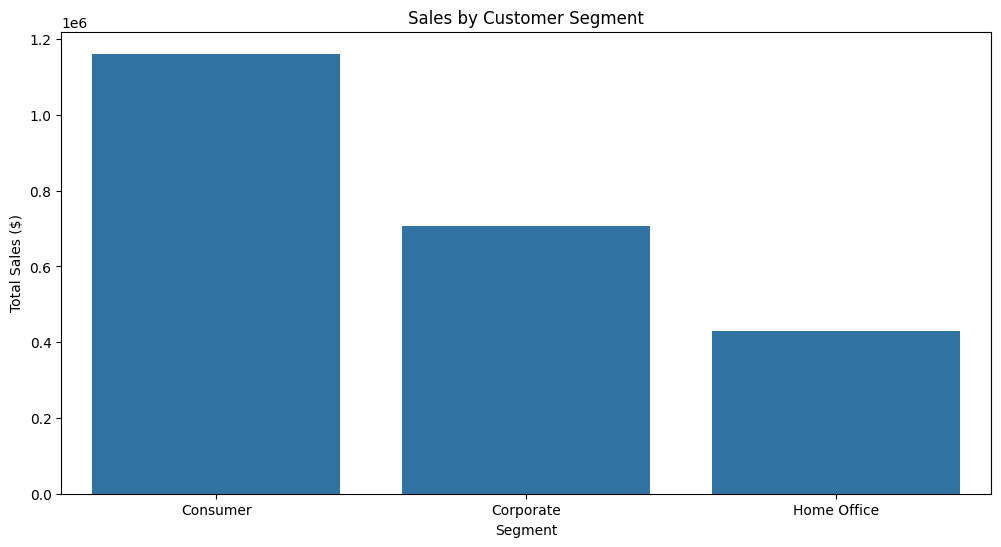

,Total Sales,Total Profit,Number of Orders,Profit Margin
Segment,,,,
Consumer,1161401.34,134119.21,5191,11.55
Corporate,706146.37,91979.13,3020,13.03
Home Office,429653.15,60298.68,1783,14.03


In [11]:
# Merge sales with customer data
sales_customer = sales_df.merge(customer_df, on='Customer ID')

# Segment performance
segment_analysis = sales_customer.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

segment_analysis.columns = ['Total Sales', 'Total Profit', 'Number of Orders']
segment_analysis['Profit Margin'] = (segment_analysis['Total Profit'] / segment_analysis['Total Sales'] * 100).round(2)

# Plot segment distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_analysis.reset_index(), x='Segment', y='Total Sales')
plt.title('Sales by Customer Segment')
plt.xticks(rotation=0)
plt.ylabel('Total Sales ($)')
plt.show()

display(segment_analysis)

# Product Category Analysis

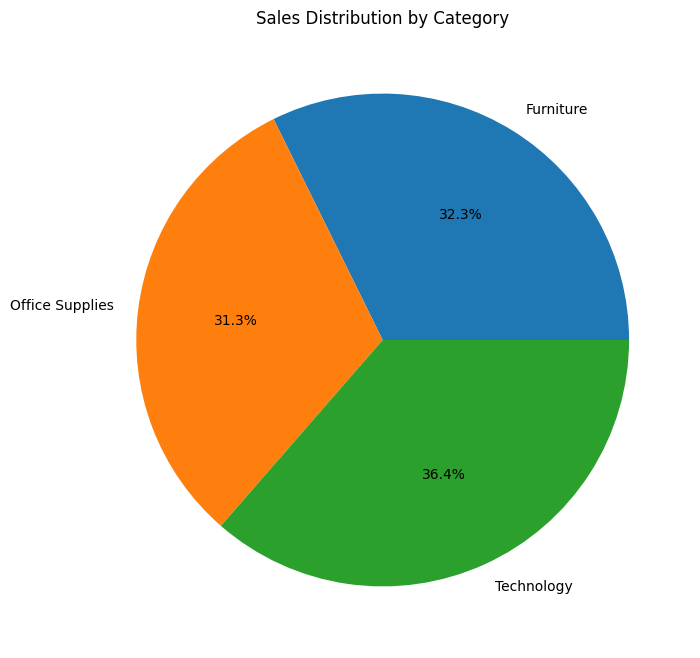

,Sales,Profit,Quantity
Category,,,
Furniture,741999.80,18451.27,8028
Office Supplies,719047.03,122490.80,22906
Technology,836154.03,145454.95,6939


In [13]:
# Merge sales with product data
sales_product = sales_df.merge(product_df, on='Product ID')

# Category performance
category_analysis = sales_product.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)

# Create a pie chart for category sales distribution
plt.figure(figsize=(10, 8))
plt.pie(category_analysis['Sales'], labels=category_analysis.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.show()

display(category_analysis)

# Profitability Analysis by Sub-Category

/var/folders/sn/l1lgb3yj34vck0fz8sx00rp80000gn/T/ipykernel_70854/317758250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=subcategory_analysis.reset_index(), x='Sub-Category', y='Profit Margin (%)', palette=colors)


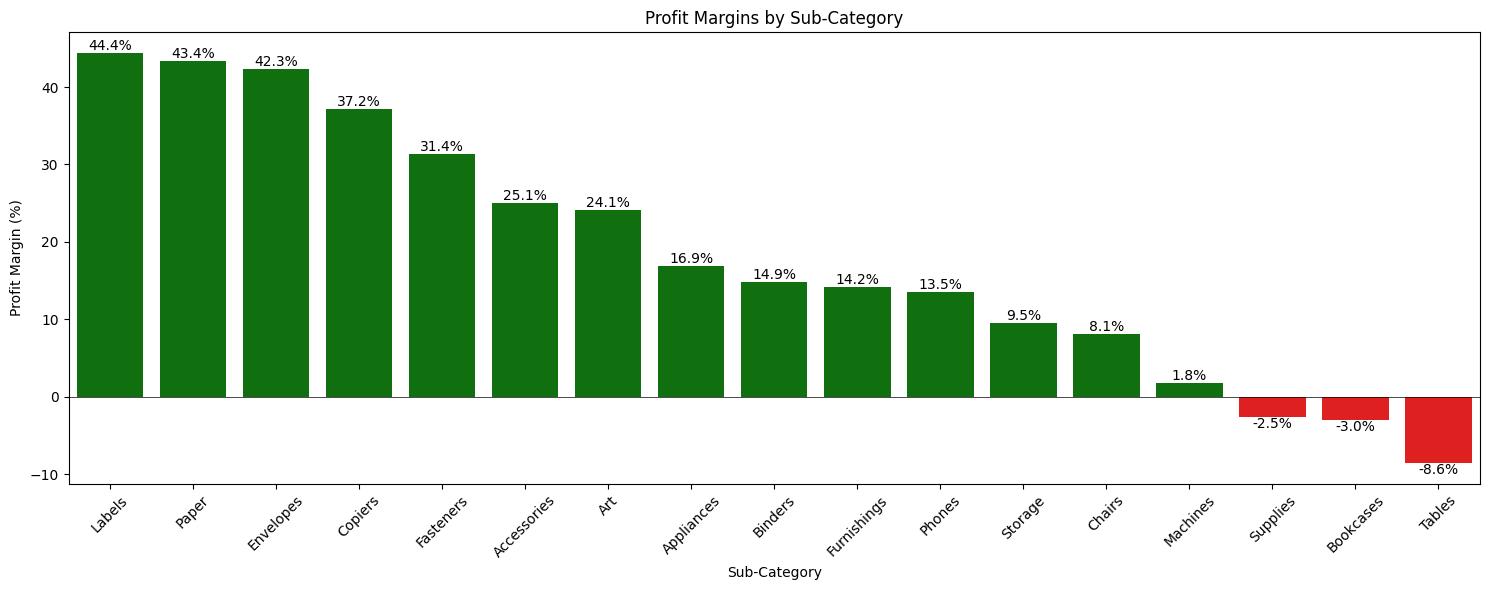

,Sales,Profit,Profit Margin (%)
Sub-Category,,,
Labels,12486.31,5546.25,44.42
Paper,78479.21,34053.57,43.39
Envelopes,16476.40,6964.18,42.27
Copiers,149528.03,55617.82,37.20
Fasteners,3024.28,949.52,31.40
Accessories,167380.32,41936.64,25.05
Art,27118.79,6527.79,24.07
Appliances,107532.16,18138.01,16.87
Binders,203412.73,30221.76,14.86


In [17]:
# Calculate profit margins by sub-category
subcategory_analysis = sales_product.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).round(2)

subcategory_analysis['Profit Margin (%)'] = (subcategory_analysis['Profit'] / subcategory_analysis['Sales'] * 100).round(2)
subcategory_analysis = subcategory_analysis.sort_values('Profit Margin (%)', ascending=False)

# Plot profit margins by sub-category
plt.figure(figsize=(15, 6))
colors = ['green' if x > 0 else 'red' for x in subcategory_analysis['Profit Margin (%)']]
ax = sns.barplot(data=subcategory_analysis.reset_index(), x='Sub-Category', y='Profit Margin (%)', palette=colors)

# Add percentage labels on top/bottom of bars
for i, v in enumerate(subcategory_analysis['Profit Margin (%)']):
    if v >= 0:
        ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    else:
        ax.text(i, v, f'{v:.1f}%', ha='center', va='top')

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Profit Margins by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(subcategory_analysis)